# Milestone 1

### ----------------------------------------
# DATA CLEANING & TRANSFORMATION (M1 - P1)
### ----------------------------------------

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

In [2]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Palkin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
# 1. Load Dataset
df = pd.read_csv("fake_job_postings.csv")

In [4]:
# 2. Keep only important text columns (optional)
text_columns = ["title", "location", "department", "company_profile", 
                "description", "requirements", "benefits"]


In [5]:
# Fill missing text fields with empty string
df[text_columns] = df[text_columns].fillna("")

In [6]:
# 3. Function to clean all text
def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()   # remove HTML
    text = re.sub(r"http\S+", "", text)                    # remove URLs
    text = re.sub(r"[^a-zA-Z ]", " ", text)                # remove special chars
    text = text.lower()                                    # lowercase
    text = text.split()                                    # tokenization
    stop = set(stopwords.words("english"))
    text = [w for w in text if w not in stop]              # remove stopwords
    return " ".join(text)

In [7]:
# 4. Apply cleaning to all text columns
for col in text_columns:
    df[col + "_clean"] = df[col].apply(clean_text)

C:\Users\Palkin\AppData\Local\Temp\ipykernel_16808\2983547728.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()   # remove HTML
C:\Users\Palkin\AppData\Local\Temp\ipykernel_16808\2983547728.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()   # remove HTML
C:\Users\Palkin\AppData\Local\Temp\ipykernel_16808\2983547728.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()   # remove HTML
C:\Users\Palkin\AppData\Local\Temp\ipykernel_16808\2983547728.py:3: MarkupResemblesLocatorWarning: The input loo

In [8]:
# 5. Convert data types (target column)
df["fraudulent"] = df["fraudulent"].astype(int)

In [9]:
# 6. Print output samples
print("\nCleaned text sample:\n")
print(df[["description", "description_clean"]].head(3))


Cleaned text sample:

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   

                                   description_clean  
0  food fast growing james beard award winning on...  
1  organised focused vibrant awesome passion cust...  
2  client located houston actively seeking experi...  


In [10]:
print("\nDataset Info After Cleaning:\n")
print(df.info())


Dataset Info After Cleaning:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   job_id                 17880 non-null  int64 
 1   title                  17880 non-null  object
 2   location               17880 non-null  object
 3   department             17880 non-null  object
 4   salary_range           2868 non-null   object
 5   company_profile        17880 non-null  object
 6   description            17880 non-null  object
 7   requirements           17880 non-null  object
 8   benefits               17880 non-null  object
 9   telecommuting          17880 non-null  int64 
 10  has_company_logo       17880 non-null  int64 
 11  has_questions          17880 non-null  int64 
 12  employment_type        14409 non-null  object
 13  required_experience    10830 non-null  object
 14  required_education     9775 non-null   

# ----------------------------------------------------
# ADVANCED EDA (FAKE JOB POSTING DATASET)
# ----------------------------------------------------


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from collections import Counter
import plotly.express as px

In [17]:
sns.set(style="whitegrid")

 1. Basic Structure & Missing Value Analysis

In [19]:
print("\n### Dataset Info ###\n")
print(df.info())



### Dataset Info ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   job_id                 17880 non-null  int64 
 1   title                  17880 non-null  object
 2   location               17880 non-null  object
 3   department             17880 non-null  object
 4   salary_range           2868 non-null   object
 5   company_profile        17880 non-null  object
 6   description            17880 non-null  object
 7   requirements           17880 non-null  object
 8   benefits               17880 non-null  object
 9   telecommuting          17880 non-null  int64 
 10  has_company_logo       17880 non-null  int64 
 11  has_questions          17880 non-null  int64 
 12  employment_type        14409 non-null  object
 13  required_experience    10830 non-null  object
 14  required_education     9775 non-null   object
 

In [20]:
print("\n### Missing Values ###\n")
print(df.isnull().sum())


### Missing Values ###

job_id                       0
title                        0
location                     0
department                   0
salary_range             15012
company_profile              0
description                  0
requirements                 0
benefits                     0
telecommuting                0
has_company_logo             0
has_questions                0
employment_type           3471
required_experience       7050
required_education        8105
industry                  4903
function                  6455
fraudulent                   0
title_clean                  0
location_clean               0
department_clean             0
company_profile_clean        0
description_clean            0
requirements_clean           0
benefits_clean               0
dtype: int64


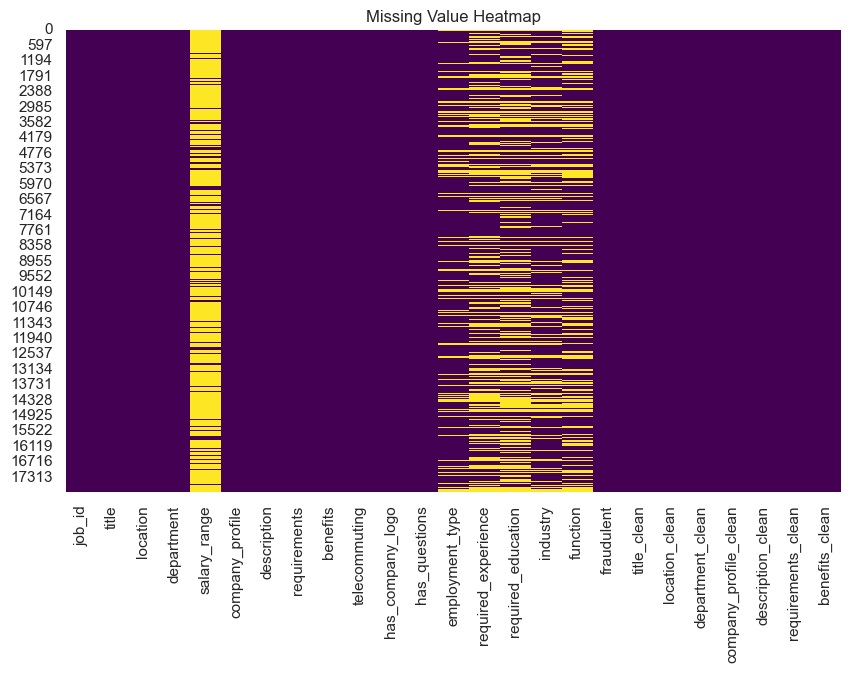

In [21]:
# Missing value heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cmap="viridis", cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

2. Class Imbalance — Better Visualization

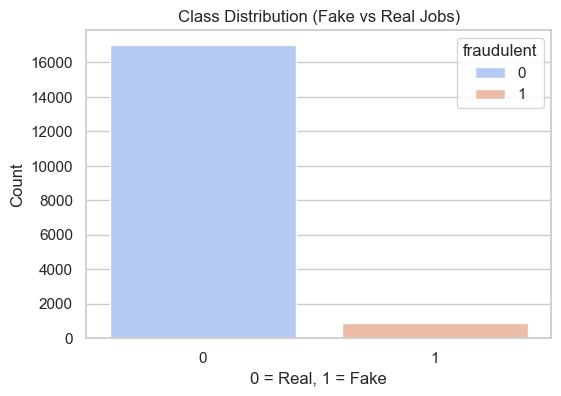

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["fraudulent"], palette="coolwarm", hue=df["fraudulent"])
plt.title("Class Distribution (Fake vs Real Jobs)")
plt.xlabel("0 = Real, 1 = Fake")
plt.ylabel("Count")
plt.show()


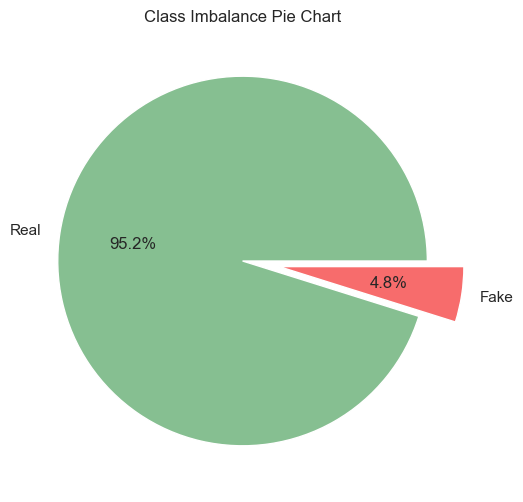

In [23]:
plt.figure(figsize=(6,6))
df["fraudulent"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", labels=["Real","Fake"], explode=[0,0.2],
    colors=["#86bf91", "#f76c6c"]
)
plt.title("Class Imbalance Pie Chart")
plt.ylabel("")
plt.show()

3. Text Length Analysis

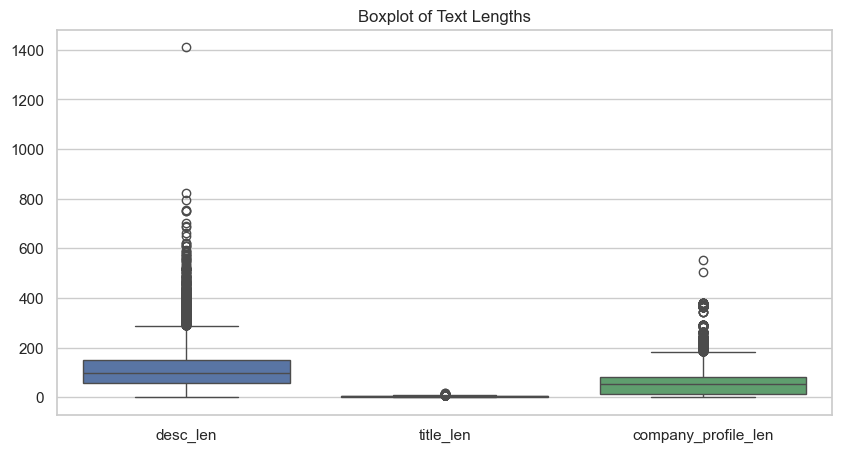

In [24]:
df["desc_len"] = df["description_clean"].apply(lambda x: len(x.split()))
df["title_len"] = df["title_clean"].apply(lambda x: len(x.split()))
df["company_profile_len"] = df["company_profile_clean"].apply(lambda x: len(x.split()))

cols = ["desc_len", "title_len", "company_profile_len"]

plt.figure(figsize=(10,5))
sns.boxplot(data=df[cols])
plt.title("Boxplot of Text Lengths")
plt.show()


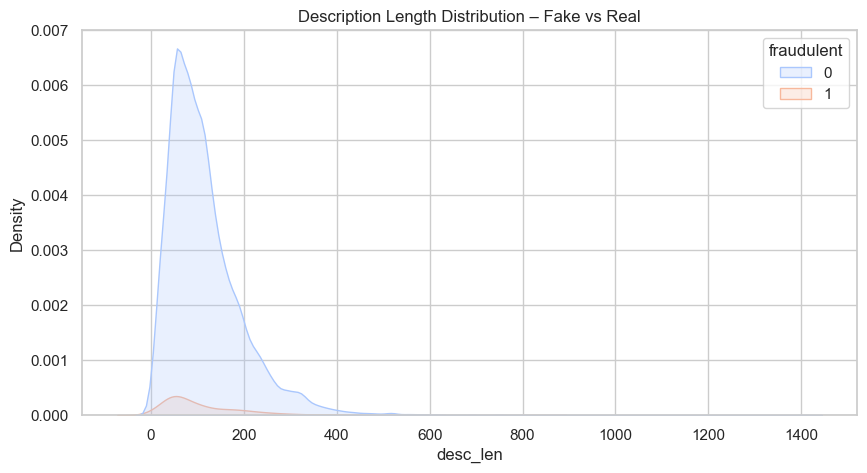

In [25]:
# Compare Fake vs Real job description lengths
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="desc_len", hue="fraudulent", fill=True, palette="coolwarm")
plt.title("Description Length Distribution – Fake vs Real")
plt.show()

4. Distribution of Job Categories (Top 10)

C:\Users\Palkin\AppData\Local\Temp\ipykernel_16808\115709270.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="mako")


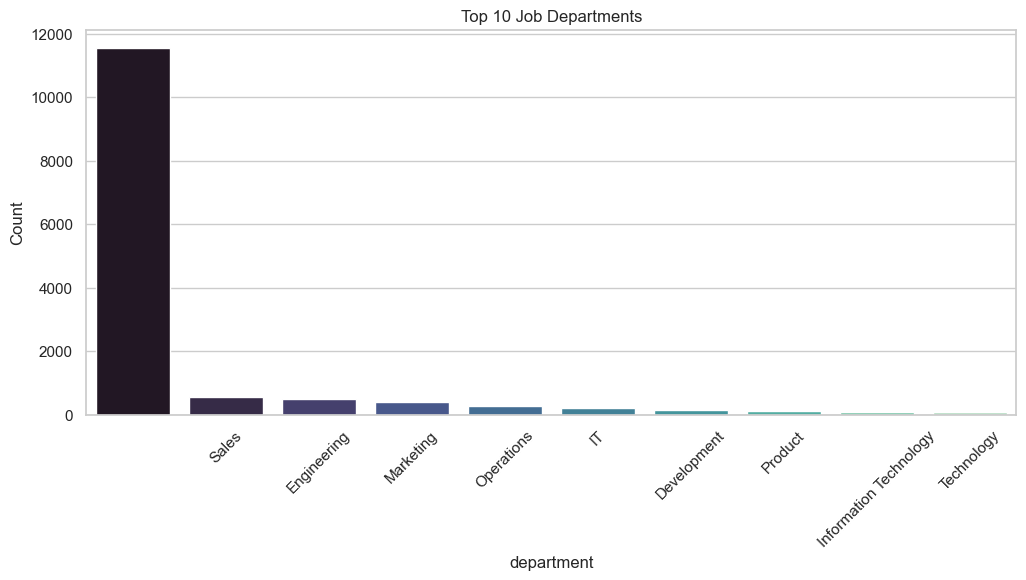

In [26]:
top_categories = df["department"].value_counts().head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="mako")
plt.xticks(rotation=45)
plt.title("Top 10 Job Departments")
plt.ylabel("Count")
plt.show()

5. WordCloud for Fake vs Real

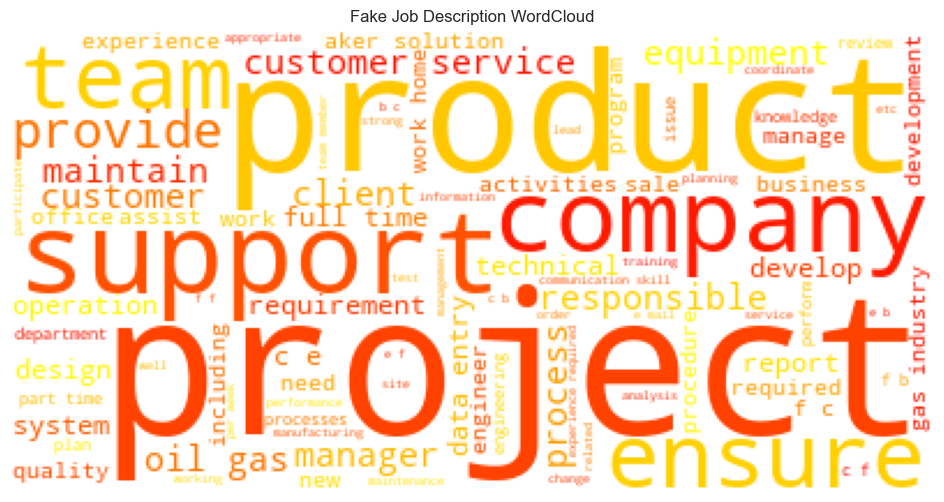

In [28]:
fake_text = " ".join(df[df["fraudulent"] == 1]["description_clean"])
real_text = " ".join(df[df["fraudulent"] == 0]["description_clean"])

# FAKE
plt.figure(figsize=(12,6))
wc = WordCloud(background_color="white", colormap="autumn").generate(fake_text)
plt.imshow(wc); plt.axis("off")
plt.title("Fake Job Description WordCloud")
plt.show()

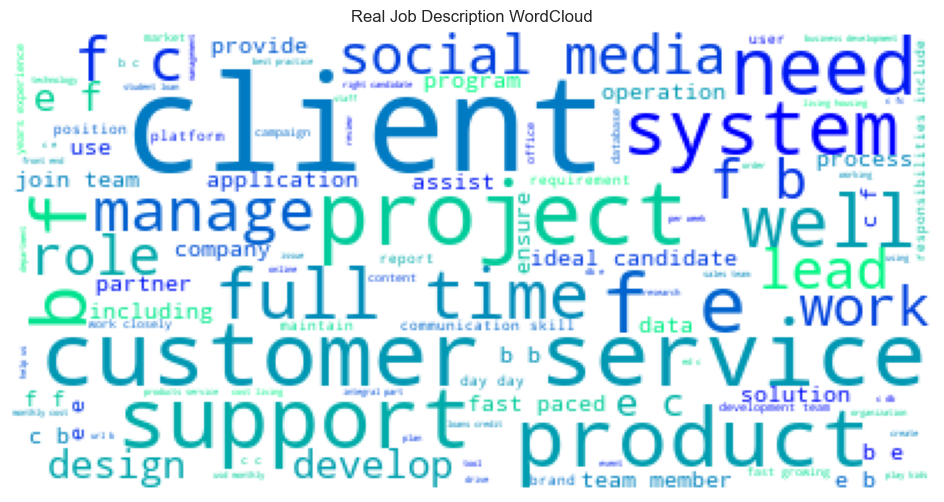

In [29]:
# REAL
plt.figure(figsize=(12,6))
wc = WordCloud(background_color="white", colormap="winter").generate(real_text)
plt.imshow(wc); plt.axis("off")
plt.title("Real Job Description WordCloud")
plt.show()

6. Bigrams (2-word phrases) – Fake vs Real

C:\Users\Palkin\AppData\Local\Temp\ipykernel_16808\1446843543.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="bigram", x="count", data=fake_df, palette="autumn")


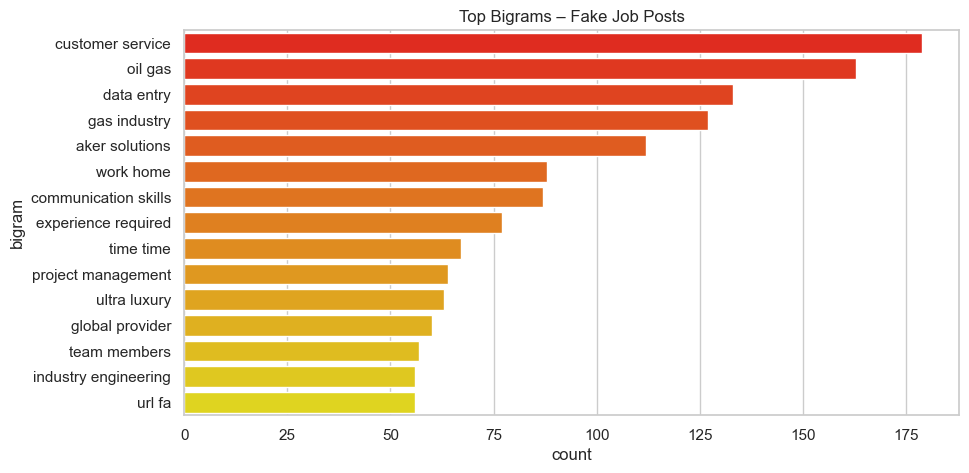

C:\Users\Palkin\AppData\Local\Temp\ipykernel_16808\1446843543.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="bigram", x="count", data=real_df, palette="winter")


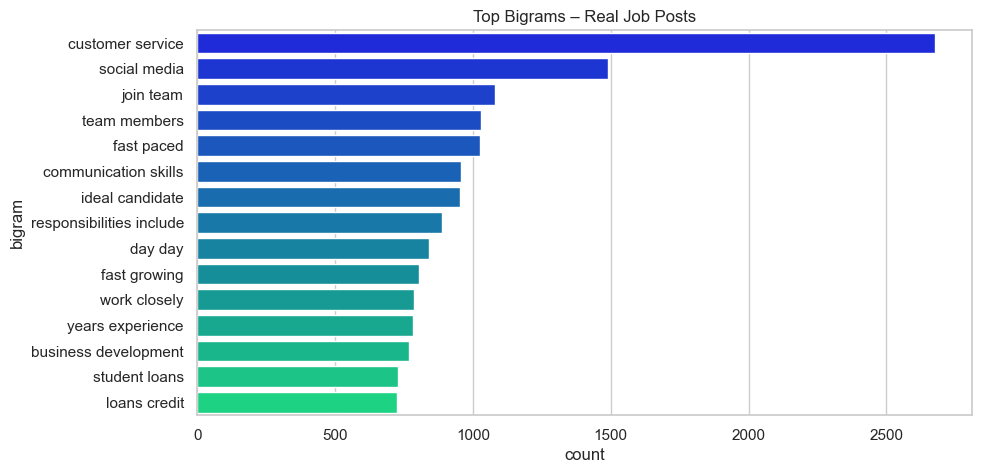

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_bigrams(corpus, n=15):
    vec = CountVectorizer(ngram_range=(2,2), stop_words="english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

fake_bigrams = get_top_bigrams(df[df["fraudulent"]==1]["description_clean"])
real_bigrams = get_top_bigrams(df[df["fraudulent"]==0]["description_clean"])

fake_df = pd.DataFrame(fake_bigrams, columns=["bigram","count"])
real_df = pd.DataFrame(real_bigrams, columns=["bigram","count"])

plt.figure(figsize=(10,5))
sns.barplot(y="bigram", x="count", data=fake_df, palette="autumn")
plt.title("Top Bigrams – Fake Job Posts")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(y="bigram", x="count", data=real_df, palette="winter")
plt.title("Top Bigrams – Real Job Posts")
plt.show()


7. Correlation Heatmap (Text-Based Features)

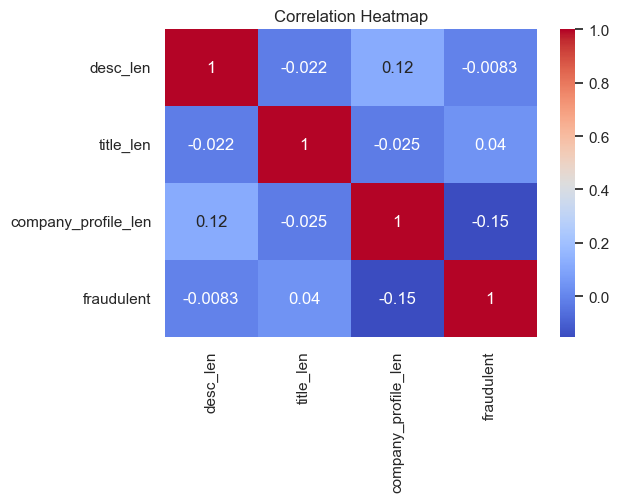

In [31]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["desc_len","title_len","company_profile_len","fraudulent"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


8. Outlier Detection – Description Length

C:\Users\Palkin\AppData\Local\Temp\ipykernel_16808\4100432850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["fraudulent"], y=df["desc_len"], palette="coolwarm")


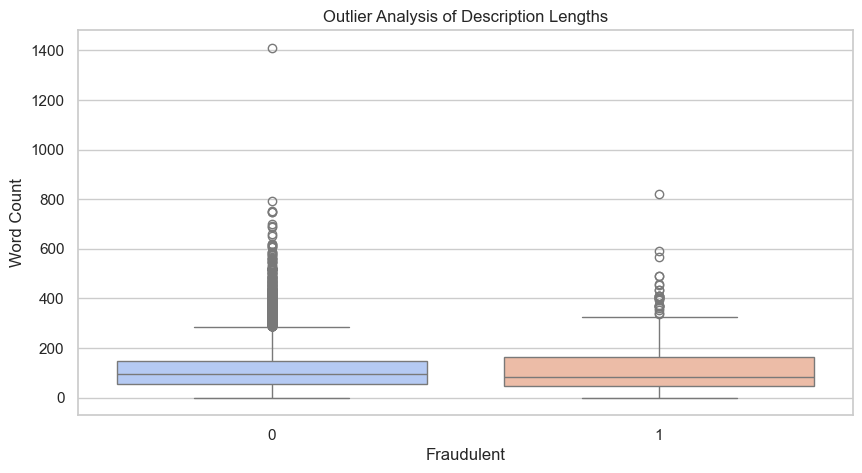

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["fraudulent"], y=df["desc_len"], palette="coolwarm")
plt.title("Outlier Analysis of Description Lengths")
plt.xlabel("Fraudulent")
plt.ylabel("Word Count")
plt.show()


Key Insights

In [35]:
print("\n\n KEY INSIGHTS FROM ADVANCED EDA ")

print("1️ Class Imbalance:")
print("   • Real jobs ≈ 95%, Fake jobs ≈ 5%\n")

print("2️ Fake Job Patterns:")
print("   • Shorter descriptions, very sales-like text")
print("   • Words like 'click', 'offer', 'bonus', 'urgent', 'money' dominate")
print("   • Missing company profile details\n")

print("3️ Real Job Patterns:")
print("   • Longer descriptions with professional keywords like 'experience',")
print("     'responsibilities', 'skills', 'team', 'requirements'.\n")

print("4️ Bigrams:")
print("   • Fake: 'click apply', 'limited time', 'bonus offer'")
print("   • Real: 'experience required', 'responsible manage', 'develop team'\n")

print("5️ Text Length Correlation:")
print("   • Longer descriptions → mostly real")
print("   • Very short descriptions → often fake\n")

print("6️ Departments & Locations:")
print("   • Fake posts mostly have missing/empty department")
print("   • Real jobs show proper structured departments\n")



 KEY INSIGHTS FROM ADVANCED EDA 
1️ Class Imbalance:
   • Real jobs ≈ 95%, Fake jobs ≈ 5%

2️ Fake Job Patterns:
   • Shorter descriptions, very sales-like text
   • Words like 'click', 'offer', 'bonus', 'urgent', 'money' dominate
   • Missing company profile details

3️ Real Job Patterns:
   • Longer descriptions with professional keywords like 'experience',
     'responsibilities', 'skills', 'team', 'requirements'.

4️ Bigrams:
   • Fake: 'click apply', 'limited time', 'bonus offer'
   • Real: 'experience required', 'responsible manage', 'develop team'

5️ Text Length Correlation:
   • Longer descriptions → mostly real
   • Very short descriptions → often fake

6️ Departments & Locations:
   • Fake posts mostly have missing/empty department
   • Real jobs show proper structured departments



# ----------------------------------------------------
#### MILESTONE 1 — PART 3
#### FEATURE EXTRACTION (TF-IDF + embeddings)
# ----------------------------------------------------


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


1. Select text & target

In [38]:
X_text = df["description_clean"]
y = df["fraudulent"]

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)

Train size: (14304,)
Test size : (3576,)


2. TF–IDF VECTORIZER

In [39]:
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

print("\nTF-IDF Feature matrix shapes:")
print("X_train_tfidf:", X_train_tfidf.shape)
print("X_test_tfidf :", X_test_tfidf.shape)


TF-IDF Feature matrix shapes:
X_train_tfidf: (14304, 5000)
X_test_tfidf : (3576, 5000)


In [40]:
from sklearn.pipeline import Pipeline

tfidf_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, stop_words="english")),
])

pipeline_features = tfidf_pipeline.fit_transform(df["description_clean"])

print("\nPipeline output shape:", pipeline_features.shape)


Pipeline output shape: (17880, 5000)
